This notebook is used for some basic exploration on modelled data.

#Importing the data
The following code imports the necessary packages and creates convinient shortcut functions. As well as assures the plots will appear in this notebook within the Out.

In [1]:
from __future__ import division, print_function

import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np

from salishsea_tools import (nc_tools, viz_tools)

%matplotlib inline

This will upload the nowcast grid T data from May 4th 2015; temperature, salinity and sea surface height.

In [2]:
filename='/data/dlatorne/MEOPAR/SalishSea/nowcast/04may15/SalishSea_1d_20150504_20150504_grid_T.nc'
f=nc.Dataset(filename)

Below I will create my own shorter variable names to facilitate accessing these variables.

In [3]:
nc_tools.show_variables(f)
lons=f.variables['nav_lon']
lats=f.variables['nav_lat']
sal=f.variables['vosaline']
temp=f.variables['votemper']
ssh=f.variables['sossheig']
dep=f.variables['deptht']

[u'deptht', u'nav_lat', u'nav_lon', u'rain_rate', u'snow_rate', u'sossheig', u'time_counter', u'time_counter_bnds', u'vosaline', u'votemper']


Making a plot of the (average) sea surface height of May 4th as a colour mesh

<matplotlib.colorbar.Colorbar instance at 0x7fb78d5d6440>

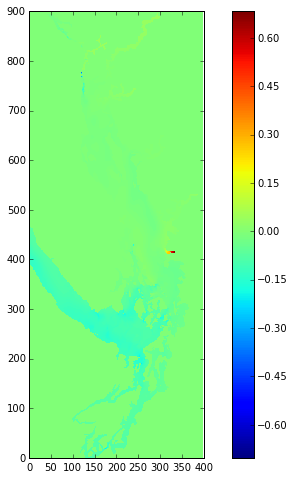

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(ssh[0])
fig.colorbar(mesh)

##Making a Complete Colour Mesh Plot 

Masking the land by creating a numpy masked array which masks the values that are zero within the ssh array and adding labels and titles.

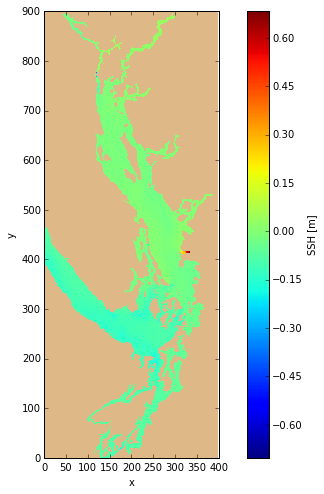

In [5]:
ssh1=np.ma.masked_values(ssh[0],0)
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
cmap = plt.get_cmap('jet')
cmap.set_bad('burlywood')
mesh = ax.pcolormesh(ssh1, cmap=cmap)
cbar=fig.colorbar(mesh)

ax.set_xlabel('x')
ax.set_ylabel('y')
cbar.set_label('SSH [{units}]'.format(units=ssh.units))


From this map we notice the sea surface height is similar, approx. 0m everywhere but at the Fraser River where it is up to approximate .60m higher. The sea surface height is slightly lower in the Juan da Fuca straight  and as we move south. 

Now I will try with temperature at the surface and I will use the longitude and latitude instead of indices.

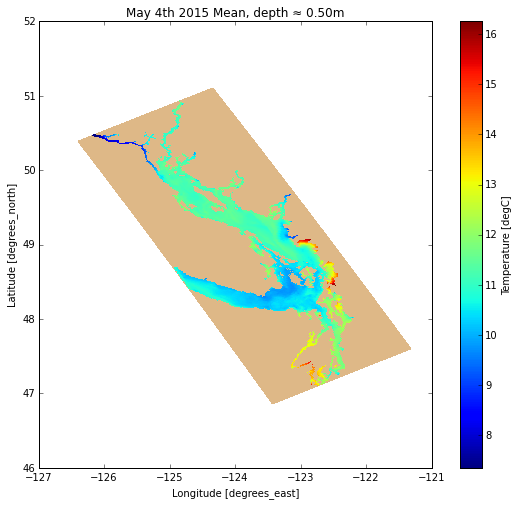

In [6]:

temp1=np.ma.masked_values(temp[0,0,:,:],0)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
cmap = plt.get_cmap('jet')
cmap.set_bad('burlywood')
mesh = ax.pcolormesh(lons[:], lats[:], temp1, cmap=cmap)
cbar=fig.colorbar(mesh)


ax.set_xlabel('{lon} [{units}]'.format(lon=lons.long_name, units=lons.units))
ax.set_ylabel('{lat} [{units}]'.format(lat=lats.long_name, units=lats.units))
cbar.set_label('{label} [{units}]'.format(label=temp.long_name.title(), units=temp.units))
ax.set_title(u'May 4th 2015 Mean, depth \u2248 {d:.2f}{z.units}'.format(d=dep[0], z=dep))

##Velocity QuiverPlots


I will upload the datasets of May 4th, 2015 with the u, v and w velocity components. The tracers, u, v and w all have different grid box sizes in x, y and depth. In order to align the u and v velocities with the tracers grod point as a reference we will use the unstagger function within viz_tools.

In [7]:
filenameu='/data/dlatorne/MEOPAR/SalishSea/nowcast/04may15/SalishSea_1d_20150504_20150504_grid_U.nc'
filenamev='/data/dlatorne/MEOPAR/SalishSea/nowcast/04may15/SalishSea_1d_20150504_20150504_grid_V.nc'
filenamew='/data/dlatorne/MEOPAR/SalishSea/nowcast/04may15/SalishSea_1d_20150504_20150504_grid_W.nc'
bathy=nc.Dataset('/data/dlatorne/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')

uvel=nc.Dataset(filenameu)
vvel=nc.Dataset(filenamev)
wvel=nc.Dataset(filenamew)

In [8]:
ugrid= uvel.variables['vozocrtx']
vgrid= vvel.variables['vomecrty']
depv= vvel.variables['depthv']

vgrid_mask=np.ma.masked_values(vgrid[0,0,:,:],0)
ugrid_mask=np.ma.masked_values(ugrid[0,0,:,:],0)
u, v=viz_tools.unstagger(ugrid_mask,vgrid_mask)

In [9]:
ugrid.coordinates

u'time_counter depthu nav_lat nav_lon'

For the next plot I will use the plot_land_mask function within viz_tools in order to fill the land area as solid polygons. This uses the bathymetry file. Quiver auto-scaling capability increases the size of the arrows when you diminish the amount of vectors you are plotting.

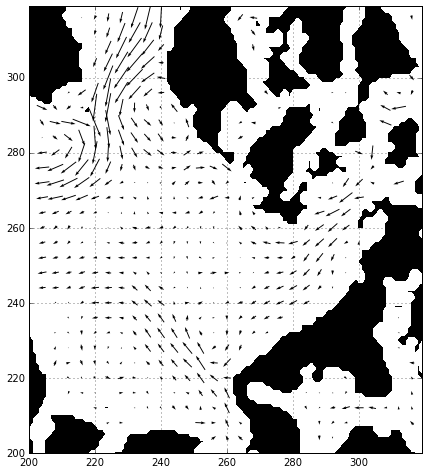

In [10]:
zlevel = 0
y_slice = np.arange(200, 320)
x_slice = np.arange(200, 320)

arrow_step = 4
y_slice_a = y_slice[::arrow_step]
x_slice_a = x_slice[::arrow_step]

ugrid_tzyx = np.ma.masked_values(ugrid[0, zlevel, y_slice_a, x_slice_a], 0)
vgrid_tzyx = np.ma.masked_values(vgrid[0, zlevel, y_slice_a, x_slice_a], 0)
u, v = viz_tools.unstagger(ugrid_tzyx, vgrid_tzyx)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
#
ax.quiver(x_slice_a[1:], y_slice_a[1:], u,v, pivot='mid')
viz_tools.plot_land_mask(ax, bathy , xslice=x_slice, yslice=y_slice)

ax.set_xlim(x_slice[0], x_slice[-1])
ax.set_ylim(y_slice[0], y_slice[-1])
ax.grid()


<matplotlib.contour.QuadContourSet instance at 0x7fb78c217098>

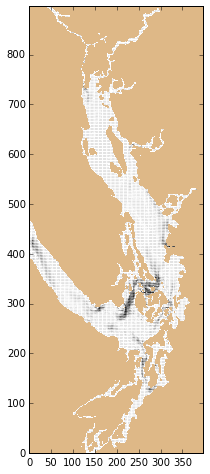

In [11]:
x_slice=np.arange(ugrid.shape[3])
y_slice=np.arange(ugrid.shape[2])

ugrid_tzyx = np.ma.masked_values(ugrid[0,0,:,:], 0)
vgrid_tzyx = np.ma.masked_values(vgrid[0,0,:,:], 0)
u, v = viz_tools.unstagger(ugrid_tzyx, vgrid_tzyx)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)

ax.quiver(x_slice[1::3], y_slice[1::3], u[::3,::3],v[::3,::3], pivot='mid')
viz_tools.plot_land_mask(ax, bathy, xslice=x_slice, yslice=y_slice, color='burlywood')

The quiver of the daily average shows the currents moving alot faster though Haro Stait and near the Fraser River. However the arrows and the detailed flow is not visible in this plot.

#Velocity Quiver with Colour map
We will now apply a colour map that corresponds to the velocity magnitude.

(350, 469)

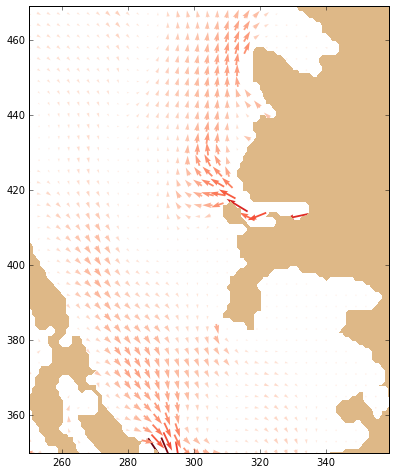

In [12]:
y_slice_zoom=np.arange(350,470)
x_slice_zoom=np.arange(250,360)

u_zoom=u[350:470,250:360]
v_zoom=v[350:470,250:360]

speed=np.sqrt(np.square(u_zoom)+np.square(v_zoom))

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)

ax.quiver(x_slice_zoom[::3], y_slice_zoom[::3], u_zoom[::3,::3],v_zoom[::3,::3], speed[::3,::3], pivot='mid', cmap='Reds', width=0.005)
viz_tools.plot_land_mask(ax, bathy, xslice=x_slice_zoom, yslice=y_slice_zoom, color='burlywood')
ax.set_xlim(x_slice_zoom[0],x_slice_zoom[-1])
ax.set_ylim(y_slice_zoom[0],y_slice_zoom[-1])

#Vetical Plane Plots

##Velocities on Vertical Plane
The figure with contain two subplots. One of the vertical depth profiles which will demontrate the average daily velocity on May 4th 2015 through the water column across a cross sectional area of the Strait of Georgia. The second will show where the trasect was taken and display the surface current of the surrounding area. 

/home/mdunn/anaconda/lib/python2.7/site-packages/numpy/ma/core.py:3900: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


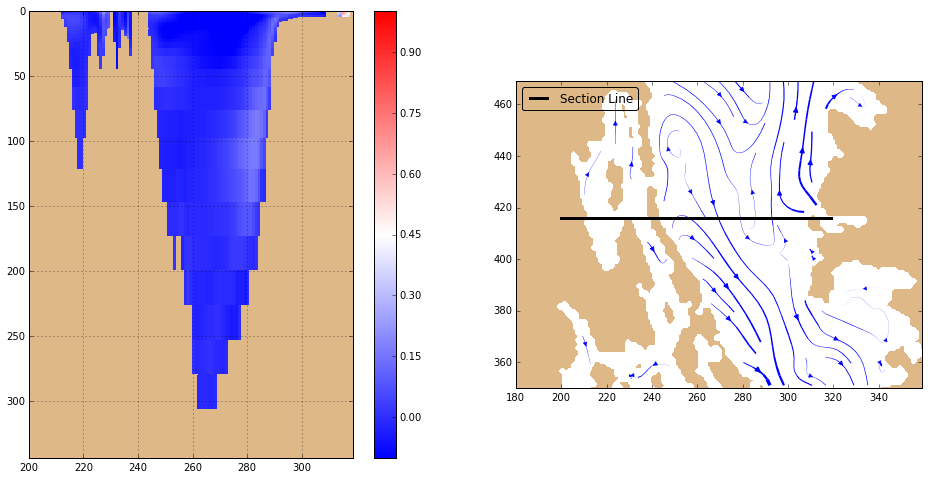

In [13]:
fig, (axl, axr)= plt.subplots(1,2,figsize=(16,8))
lcolour='burlywood'

t=0 #The daily average only have one time
zmax=37 #The vertical profile will go down to the 41th depth bin... it only has 40...
ycross=416 #The cross sectional area will be taken along the 416th index of y

x_slice_cross=np.arange(200, 320)
timestamp=nc_tools.timestamp(vvel,t)

#Mask and slice
v_vel=np.ma.masked_values(vgrid[t, :zmax, ycross,x_slice_cross],0)

cmap=plt.get_cmap('bwr')
cmap.set_bad(lcolour)
mesh= axl.pcolormesh(x_slice_cross[:],depv[:zmax], v_vel,cmap=cmap, vmin=-0.1, vmax=1)
axl.invert_yaxis()
cbar=fig.colorbar(mesh, ax=axl)

axl.set_xlim(x_slice_cross[0], x_slice_cross[-1])
axl.set_ylim(depv[zmax-2] +10,0)
axl.grid()


#Second subplot
y_slice=np.arange(350,470)
x_slice=np.arange(180,360)

u_mask=np.ma.masked_values(ugrid[t,0,y_slice, x_slice],0)
v_mask=np.ma.masked_values(vgrid[t,0,y_slice, x_slice],0)

u_unstag,v_unstag=viz_tools.unstagger(u_mask,v_mask)
speeds=np.sqrt(np.square(u_unstag)+np.square(v_unstag))
max_speed=viz_tools.calc_abs_max(speeds)

viz_tools.set_aspect(axr)
axr.streamplot(x_slice[1:], y_slice[1:], u_unstag, v_unstag, linewidth=6*speeds/max_speed)
viz_tools.plot_land_mask(axr,bathy,xslice=x_slice, yslice=y_slice,color=lcolour)
axr.plot(x_slice_cross, ycross*np.ones_like(x_slice_cross), linestyle='solid', linewidth=3, color='black', label='Section Line')
axr.legend(loc='best', fancybox=True)

##Salinity Contour Mesh
The last plot I will create in this note book will be of the vetical salinity all along the Georgia Strait following the deepest cross-section.

IndexError: integer sequences in slices must be sorted and cannot have duplicates

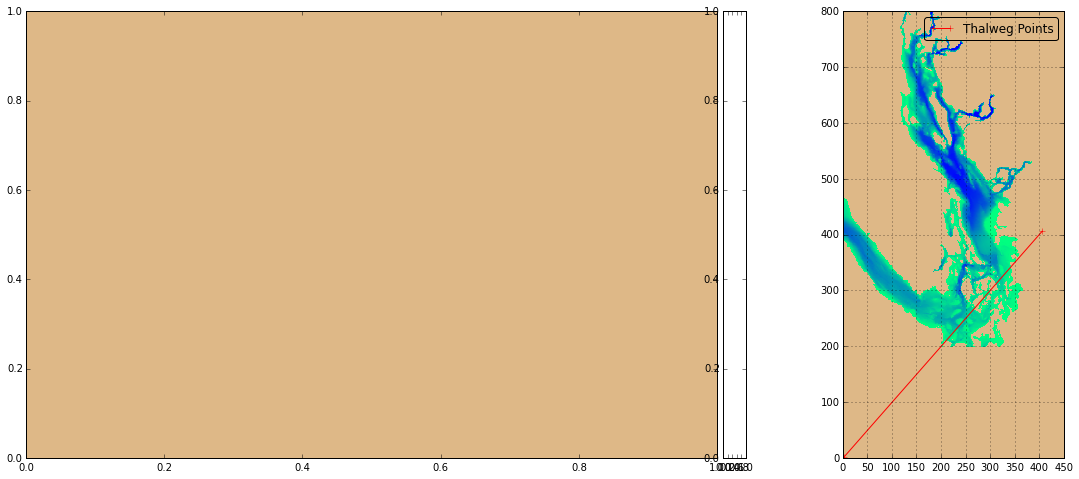

In [14]:
#Loading the array with the deepest point of the strait.
thalweg=np.loadtxt('/data/dlatorne/MEOPAR/tools/bathymetry/thalweg_working.txt',delimiter=" ", unpack=False)
thalweg=thalweg.astype(int)
fig,(axl,axcb,axr)=plt.subplots(1,3,figsize=(16,8))

axl.set_axis_bgcolor(lcolour)
axr.set_axis_bgcolor(lcolour)
axl.set_position((0.125, 0.125, 0.6, 0.775))
axcb.set_position((0.73, 0.125, 0.02, 0.775))
axr.set_position((0.83, 0.125, 0.2, 0.775))

#First we will do the map with thalweg line on it
viz_tools.set_aspect(axr)
cmap=plt.get_cmap('winter_r')
cmap.set_bad(lcolour)
bathym=bathy.variables['Bathymetry']
x_slice=np.arange(bathym.shape[1])
y_slice=np.arange(200,800)
axr.pcolormesh(x_slice, y_slice, bathym[y_slice, x_slice], cmap=cmap)
axr.plot(thalweg[1], thalweg[0], linestyle='-', marker='+', color='red', label='Thalweg Points')
axr.legend(loc='best', fancybox=True)
axr.grid()

#Salinity coutour plot
salmin=26
salmax=34
dels=0.5

cmap=plt.get_cmap('rainbow')
cmap.set_bad(lcolour)
sal_0=sal[0,:,thalweg[:,0],thalweg[:,1]]
sal_mask=np.ma.masked_values(sal_0,0)
x,z=np.meshgrid(np.arange(thalweg.shape[1]), dep)
mesh=axl.pcolormesh(x,z,sal_mask, cmap=cmap, vmin=salmin, vmax=salmax)
cbar=plt.colorbar(mesh,cax=axcb)
clines=axl.colour(x,z,sal_mask,np.arange(salmin,salmax,dels), color='black')
axl.invert_yaxis()



In [ ]:
sal[0,24,thalweg[0],thalweg[1]]

In [ ]:
thalweg.shape

In [ ]:
sal.shape

In [ ]:
thalweg[:,0]

In [ ]:
thalweg[1]